In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import scipy.stats as stats
import seaborn as sns
import numpy as np
from pydataset import data

***Exercises***

Do your work for this exercise in a jupyter notebook named hypothesis_testing.ipynb.

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

**Has the network latency gone up since we switched internet service providers?**


H0: The network latency has remained the same

Ha: The network latency has increased since ISP change


**Is the website redesign any good?**


H0: Website reviews have stayed the same

HA: Website reviews have improved since 'x'


**Is our television ad driving more sales?**

H0: Sales are unchanged post ad

HA: Sales have increased post ad

**T-Test Exercises**
Continue working in your hypothesis_testing notebook.



Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.


In [3]:
#H0 : Sales are the same in each office
#HA : Sales are different for each office
# two tailed with ⍺= 0.05
 
mean_o_1 = 90
std_o_1 = 15
sample_size_01 = 40
mean_o_2 = 100
std_o_2 = 20
sample_size_02 = 50

t,p = stats.ttest_ind_from_stats(mean_o_1,std_o_1, sample_size_01,mean_o_2,std_o_2,sample_size_02,equal_var=False)
t, p

#p is less than ɑ therefor reject H0

(-2.7091418459143854, 0.00811206270346016)


Load the mpg dataset and use it to answer the following questions:


In [6]:
mpg = data ('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact



Is there a difference in fuel-efficiency in cars from 2008 vs 1999?


In [9]:
#make a column for avg mpg
mpg['avg_mpg'] = (mpg['cty']+mpg['hwy'])/2

In [10]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [25]:
avg_mpg_99 = mpg[mpg.year == 1999].avg_mpg
cty_mpg_99 = mpg[mpg.year == 1999].cty
hwy_mpg_99 = mpg[mpg.year == 1999].hwy
avg_mpg_08 = mpg[mpg.year == 2008].avg_mpg
cty_mpg_08 = mpg[mpg.year == 2008].cty
hwy_mpg_08 = mpg[mpg.year == 2008].hwy

((array([ 7.,  3., 30.,  6., 15., 15., 25., 10.,  2.,  4.]),
  array([12. , 14.5, 17. , 19.5, 22. , 24.5, 27. , 29.5, 32. , 34.5, 37. ]),
  <BarContainer object of 10 artists>),
 (10.0, 45.0),
 Text(0.5, 1.0, 'hwy mpg 08'))

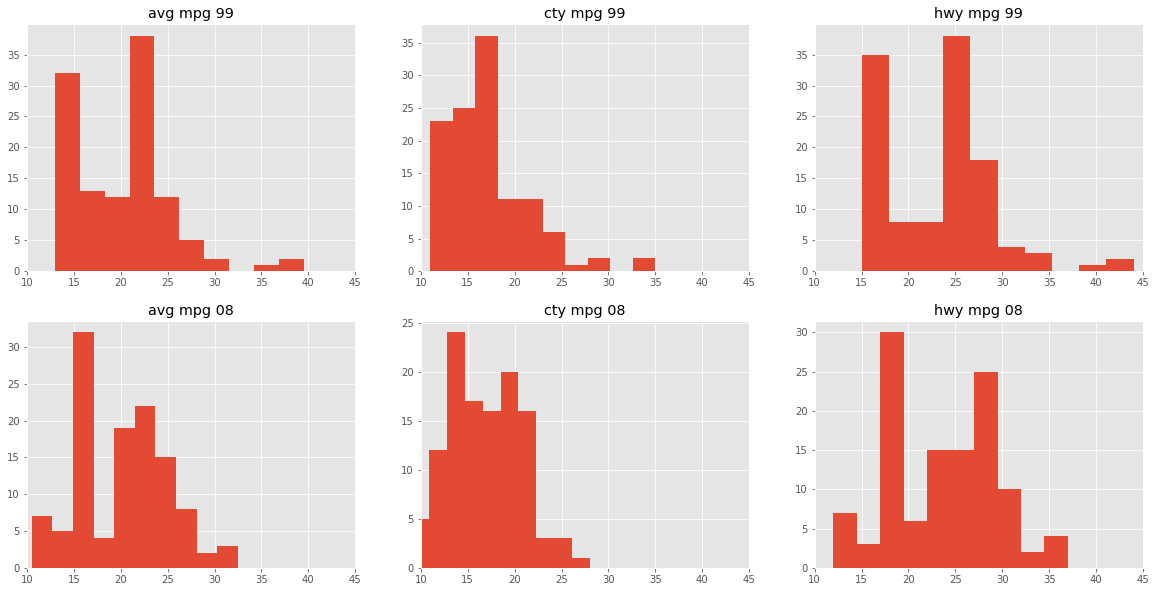

In [52]:
plt.figure(figsize = (20,10))
x = (10,45)

plt.subplot(2,3,1)
plt.hist(avg_mpg_99), plt.xlim(x) , plt.title('avg mpg 99')
plt.subplot(2,3,2)
plt.hist(cty_mpg_99) , plt.xlim(x) , plt.title('cty mpg 99')
plt.subplot(2,3,3)
plt.hist(hwy_mpg_99) , plt.xlim(x) , plt.title('hwy mpg 99')
plt.subplot(2,3,4)
plt.hist(avg_mpg_08) , plt.xlim(x) , plt.title('avg mpg 08')
plt.subplot(2,3,5)
plt.hist(cty_mpg_08), plt.xlim(x) , plt.title('cty mpg 08')
plt.subplot(2,3,6)
plt.hist(hwy_mpg_08) , plt.xlim(x) , plt.title('hwy mpg 08')

In [54]:
#it appears there is a difference rather you measure, city, hwy, or avg
t, p = stats.ttest_ind(avg_mpg_99, avg_mpg_08 )
t, p
# two tailed, compare p to ɑ, p>ɑ, reject null, there is a difference

(0.21960177245940962, 0.8263744040323578)

Are compact cars more fuel-efficient than the average car?


In [ ]:
# H0 : compact cars mpg =< average
# HA : compact cars  mpg > avevage

In [42]:
compact = mpg[mpg['class'] == 'compact'].avg_mpg
average = mpg.avg_mpg

((array([17., 51., 30., 57., 36., 29., 10.,  1.,  1.,  2.]),
  array([10.5, 13.4, 16.3, 19.2, 22.1, 25. , 27.9, 30.8, 33.7, 36.6, 39.5]),
  <BarContainer object of 10 artists>),
 (10.0, 40.0),
 Text(0.5, 1.0, 'average'))

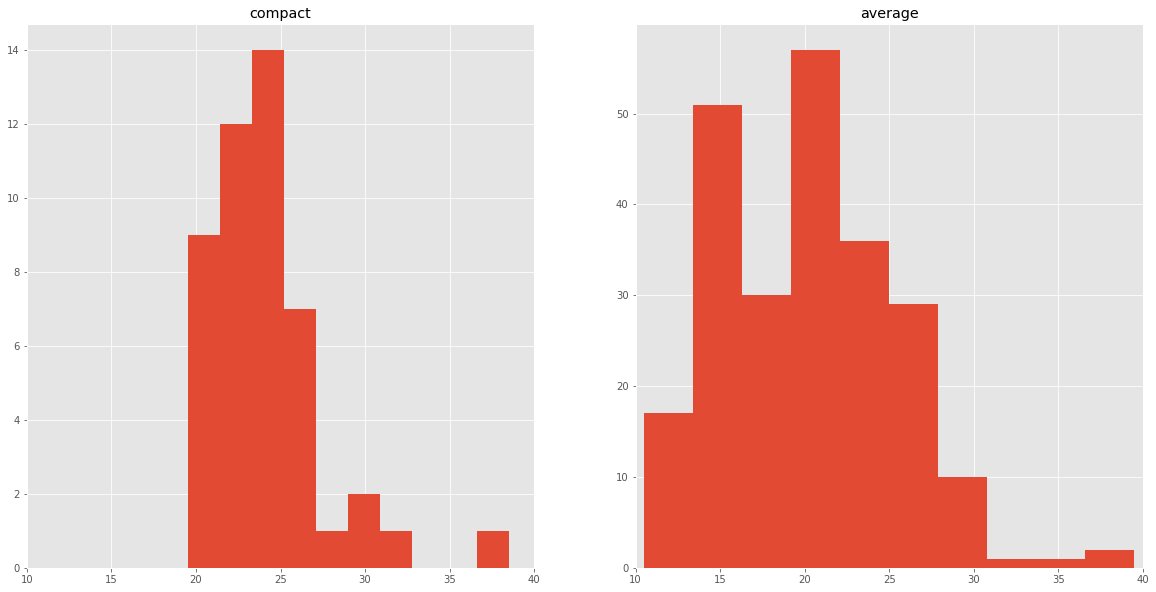

In [55]:
plt.figure(figsize = (20,10))
x = (10,40)
plt.subplot(1,2,1)
plt.hist(compact), plt.xlim(x), plt.title('compact')
plt.subplot(1,2,2)
plt.hist(average), plt.xlim(x), plt.title('average')

In [57]:
# appears compacts are more efficient from the graph
t, p = stats.ttest_ind(compact, average )
t, p/2
# one tailed, compare p/2 to ɑ, p/2<ɑ & t >0, confirm null,
#  compacts are more effiecent

(5.260311926248542, 1.4342273079064686e-07)

Do manual cars get better gas mileage than automatic cars?

In [ ]:
# H0 : manual cars mpg =< auto
# HA : manual cars  mpg > auto

In [60]:
manual = mpg[mpg['trans'].str.contains('auto')].avg_mpg
auto = mpg[mpg['trans'].str.contains('manual')].avg_mpg

((array([ 1., 10.,  8., 22., 10., 19.,  4.,  1.,  0.,  2.]),
  array([10.5, 13.4, 16.3, 19.2, 22.1, 25. , 27.9, 30.8, 33.7, 36.6, 39.5]),
  <BarContainer object of 10 artists>),
 (10.0, 40.0),
 Text(0.5, 1.0, 'auto'))

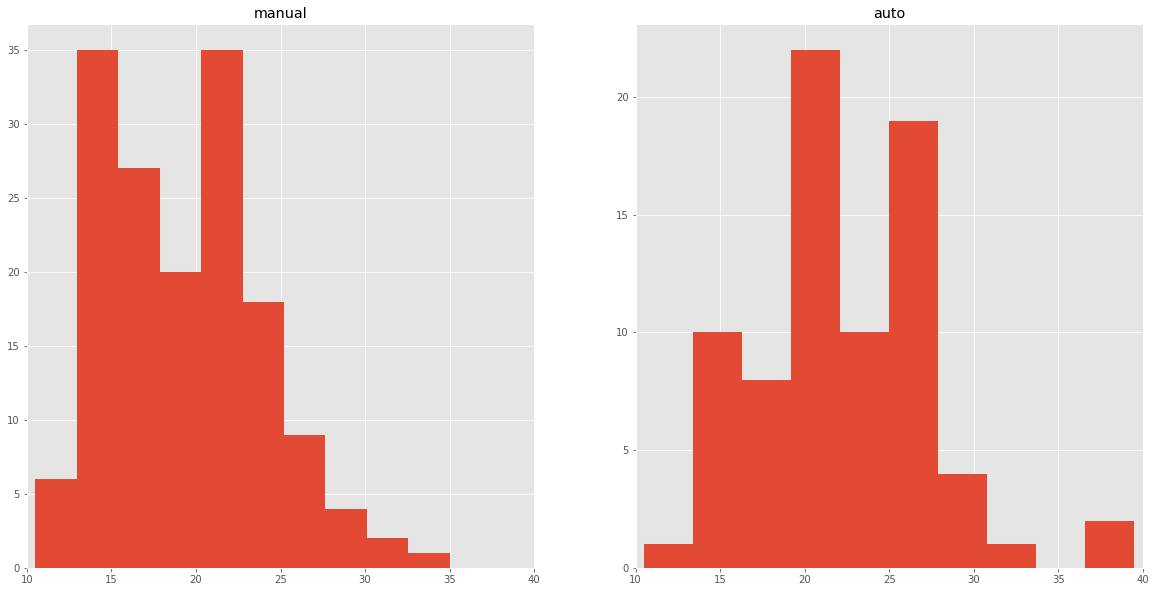

In [61]:
plt.figure(figsize = (20,10))
x = (10,40)
plt.subplot(1,2,1)
plt.hist(manual), plt.xlim(x), plt.title('manual')
plt.subplot(1,2,2)
plt.hist(auto), plt.xlim(x), plt.title('auto')

In [62]:
# appears automatics are more efficient from the graph
t, p = stats.ttest_ind(manual, auto)
t, p/2
# one tailed, compare p/2 to ɑ, p/2<ɑ, however, t <0, reject null,
# automatics are more effiecent

(-4.593437735750014, 3.5771872005728416e-06)

Text(0, 0.5, 'average mpg')

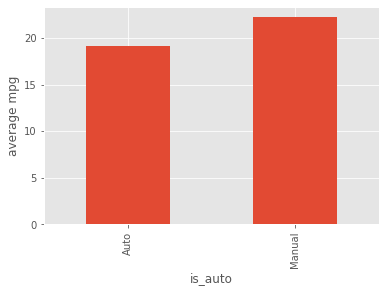

In [66]:
#more proof
mpg['is_auto'] = np.where(mpg.trans.str.contains('auto'), 'Auto', 'Manual')
mpg.groupby('is_auto').avg_mpg.mean().plot.bar()
plt.ylabel('average mpg')